## Final Project Submission

Please fill out:
* Student name: RYAN MUSASIA  
* Student pace: full time
* Scheduled project review date/time: 30/09/2022 
* Instructor name: William Okomba 
* Blog post URL:


# PROJECT:    [House_Prediction_Analysis]

# Table of Content


1. Introduction
2. Data Understanding
3. Data Cleaning 
4. Modelling 
5. Linear Regression 
6. Results

# Business Understanding 

# Business Overview 

A real estate agency seeks to provide homeowners with the requisite information which wil in turn aid them in buying and/or selling their homes.

# Objectives 

1. In providing the service of property evaluation, we intend to  provide constructive advice to stakeholders about current and future house prices by building by developing a model that predicts the price of these houses.
2. In general we would like to conduct an analysis to determine which factors have the greatest influence on the estimated value of the houses and by how much. This will help in determining where to focus more effort in order to complete this project successfully.
 

# INTRODUCTION:

# Data Description


The King County House Dataset contains a wealth of information about the price, size, location, condition and various other features of houses in Washington’s King County. In this article, I’ll present how I built a multiple linear regression model in Python to predict house prices.

# DATA UNDERSTANDING:

Here will check our variables and try as much as possible to understand it and how it will relate to our questions

In [1]:
#importing the necessary libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm 
import warnings 
warnings.filterwarnings ('ignore')

Column Names and Descriptions for King County Data Set

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
  * Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts
* `view` - Quality of view from house
  * Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each condition code
* `grade` - Overall grade of the house. Related to the construction and design of the house.
  * See the [King County Assessor Website](https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r) for further explanation of each building grade code
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


# Loading of Data 

The dataset used in our project is from kc_house_data.csv The data is in the form of a csv file 

In [2]:
# Dataset we'll work with.
df=pd.read_csv("data/kc_house_data.csv")

In [3]:
#Let's preview the first five rows of the dataset
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
#Let's preview the last five rows of the dataset
df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,NO,NONE,...,7 Average,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [5]:
#Lets get the number of rows and columns
print('The dataset has ' + str(df.shape[0]) + ' rows and ' + str(df.shape[1]) + ' columns')

The dataset has 21597 rows and 21 columns


In [6]:
# checking the column names of the dataset 
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [7]:
#check for the statistical description of numerical data in the dataset 
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.describe(include = 'all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,21597,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221,21534,...,21597,21597.000000,21597,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,2,5,...,11,NaN,304,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,6/23/2014,NaN,NaN,NaN,NaN,NaN,NaN,NO,NONE,...,7 Average,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,19075,19422,...,8974,NaN,12826,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580474e+09,NaN,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,NaN,NaN,...,NaN,1788.596842,NaN,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,NaN,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,NaN,NaN,...,NaN,827.759761,NaN,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,NaN,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,NaN,NaN,...,NaN,370.000000,NaN,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,NaN,NaN,...,NaN,1190.000000,NaN,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,NaN,NaN,...,NaN,1560.000000,NaN,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,NaN,NaN,...,NaN,2210.000000,NaN,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

The dataframe has 6 objects, 6floats and 9int64s

In [10]:
#checking for null values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The waterfront, year renovated, and view columns contain 2376, 3842 and 63 null values respectively.

In [11]:
#checking for duplicates in the dataset 
df.duplicated().sum()

0

The dataframe has no duplicates

# Data Cleaning 

Checking for Validity, Accuracy, Completeness, Consistency and Uniformity of the Data.

In [12]:
#Removing the rows that conrtain null values 
df.dropna(inplace = True)

In [13]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There are no missing values in our data. 

# DATA ANALYSIS 

# EXPLORATORY DATA ANALYSIS (EDA)

# UNIVARIATE

a) Numerical

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

<AxesSubplot:xlabel='price'>

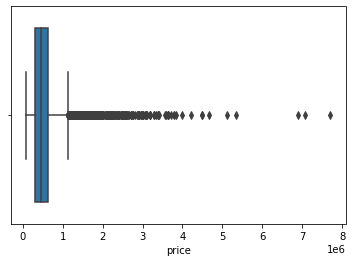

In [15]:
sns.boxplot(x=df['price'])

# From the boxplots below it can be seen that there are a lot of outliers.

In [16]:
#Checking for outliers
Q1_price = df['price'].quantile(.25)
Q3_price = df['price'].quantile(.75)

IQR_price = Q3_price - Q1_price


anomalies = df[(df.price < Q1_price - 1.5* IQR_price)  |
                    (df.price > Q3_price + 1.5 * IQR_price) ]
print('Price outliers are: ' + str(anomalies.price.count()))

Price outliers are: 831


From the above, the outliers are too many to remove as this will affect the accuracy of the data analysis, and the result could be inconclusive and/or incorrect.

b) Categorical 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

<AxesSubplot:>

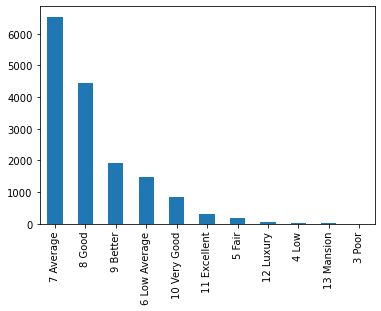

In [18]:
#Grade
df.grade.value_counts().plot.bar()

The majority of the data suggests that the majority of the houses being sold fall under the 7-average grade, which makes sense since its the middle point where majority of the buyers seems to afford compared with the extremes which are mansion and poor.

c) Summary Statistics

In [19]:
df.price.describe()

count    1.576200e+04
mean     5.413172e+05
std      3.722258e+05
min      8.200000e+04
25%      3.210000e+05
50%      4.500000e+05
75%      6.448750e+05
max      7.700000e+06
Name: price, dtype: float64

In [20]:
#skewness
print('The skewness of price is : ' +str(df.price.skew()))

# The positive values indicates that the tail of the data is right-skewed.

The skewness of price is : 4.226727017501067


In [21]:
# kurtosis
print('The kurtosis of price is: ' +str(df.price.kurt()))

# The data has positive kurtosis indicating that the distribution has heavier tails 
# and a taller peak than the normal distribution. 

The kurtosis of price is: 38.08318765902726


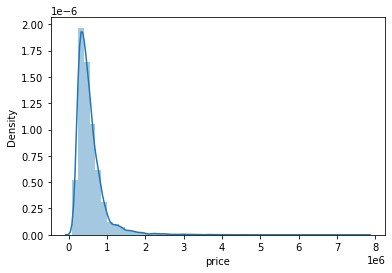

In [22]:
sns.distplot(df.price);

d) Univariate Analysis Recommendation


The data is heavily skewed to the right i.e. leptokurtic, as was suspected due to the large number of outliers. This suggests that our initial decision to keep them is justified as this is not a normally distributed dataset. We have decided to use a sample of our price column our target variable, however, future analysis can be done and the results compared.

# BIVARIATE ANALYSIS

a) Relationship with numerical values

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15762 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15762 non-null  int64  
 1   date           15762 non-null  object 
 2   price          15762 non-null  float64
 3   bedrooms       15762 non-null  int64  
 4   bathrooms      15762 non-null  float64
 5   sqft_living    15762 non-null  int64  
 6   sqft_lot       15762 non-null  int64  
 7   floors         15762 non-null  float64
 8   waterfront     15762 non-null  object 
 9   view           15762 non-null  object 
 10  condition      15762 non-null  object 
 11  grade          15762 non-null  object 
 12  sqft_above     15762 non-null  int64  
 13  sqft_basement  15762 non-null  object 
 14  yr_built       15762 non-null  int64  
 15  yr_renovated   15762 non-null  float64
 16  zipcode        15762 non-null  int64  
 17  lat            15762 non-null  float64
 18  long  

In [24]:
df.bathrooms.value_counts()

2.50    4004
1.00    2761
1.75    2226
2.25    1487
2.00    1395
1.50    1060
2.75     853
3.00     543
3.50     543
3.25     428
3.75     104
4.00     100
4.50      75
4.25      62
0.75      50
4.75      17
5.00      14
5.25      11
5.50       8
1.25       6
6.00       5
0.50       3
8.00       2
5.75       2
7.75       1
7.50       1
6.75       1
Name: bathrooms, dtype: int64

In [25]:
df.bathrooms.describe()

count    15762.000000
mean         2.120797
std          0.766772
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

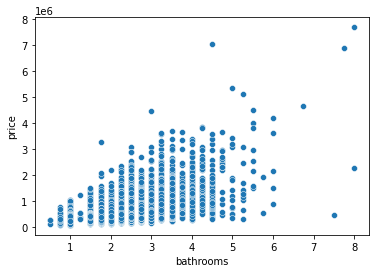

In [26]:
#scatter plot between price and bathroom
bathrooms = df.bathrooms
price = df.price
sns.scatterplot(data = df,x = bathrooms,y = price);

In [27]:
count = 0
bath_outliers = []
mean = np.mean(df.bathrooms)
max_distance = np.std(df.bathrooms) * 3
for idx, row in df.bathrooms.T.iteritems():
    if abs(row-mean) >= max_distance:
        count += 1
        df.drop(idx, inplace=True)
count

137

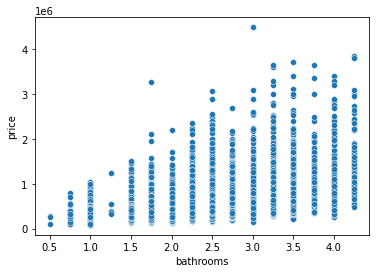

In [28]:
#scatter plot between price and bathroom
bathrooms = df.bathrooms
price = df.price
sns.scatterplot(data = df,x = bathrooms,y = price);

# Observation

The 'bathrooms' column appears to be linearly related to the 'price' column. This relationship is positive, which means that as the number of bathrooms increases, so will the price.

# b) Normality

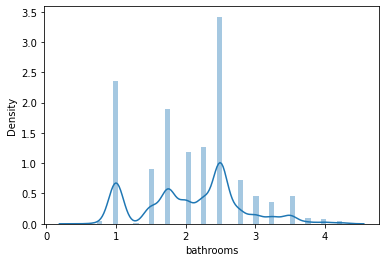

<Figure size 432x288 with 0 Axes>

In [29]:
#distribution for bathrooms
sns.distplot(df.bathrooms)
fig = plt.figure();

In [30]:
#skewness and kurtosis
print('The skewness of bathrooms is : ' +str(df.bathrooms.skew()))

print('The kurtosis of bathrooms is : ' +str(df.bathrooms.kurt()))

The skewness of bathrooms is : 0.1268743155237061
The kurtosis of bathrooms is : -0.3499341924471375


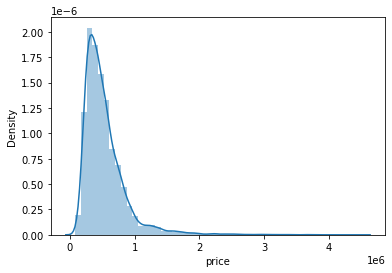

In [31]:
# checking the distribution of price column
sns.distplot(df.price);


In [32]:
#skewness and kurtosis
print('The skewness of price is : ' +str(df.price.skew()))

print('The kurtosis of price is : ' +str(df.price.kurt()))

The skewness of price is : 2.956329448156603
The kurtosis of price is : 15.296304672604363


# Observation from the distribution for price column

The plot shows that the price column is positively skewed, indicating that our data is not normally distributed. Thus, it has leptokurtic kurtosis.

Relationship with Categorical variables

In [33]:
df.grade.value_counts()

7 Average        6527
8 Good           4422
9 Better         1906
6 Low Average    1482
10 Very Good      801
11 Excellent      249
5 Fair            167
12 Luxury          49
4 Low              16
13 Mansion          5
3 Poor              1
Name: grade, dtype: int64

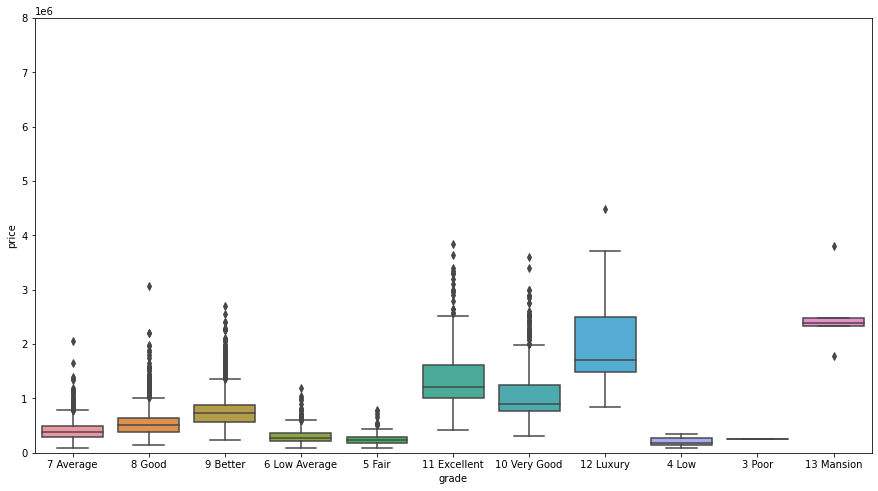

In [34]:
#box plot grade and price
data = pd.concat((df.price, df.grade), axis=1)
f, ax = plt.subplots(figsize=(15, 8))
fig = sns.boxplot(x='grade', y="price", data=data)
fig.axis(ymin=0, ymax=8000000);

The graph above demonstrates a strong relationship between the price and the house's grade. As a result, the higher the house's grade in terms of construction and design, the higher the house's price.

# In Summary

We can conclude that:

'bathrooms' seem to be linearly related with 'price'. It's relationships iis positive, which means that as one variable increases, the other also increases. The box plot shows how prices increase with the number of bathrooms.

'grade' also seem to be related with 'price'. But this mainly depends with the purchasing power of gthe buyer. 



Correlation matrix (heat map)

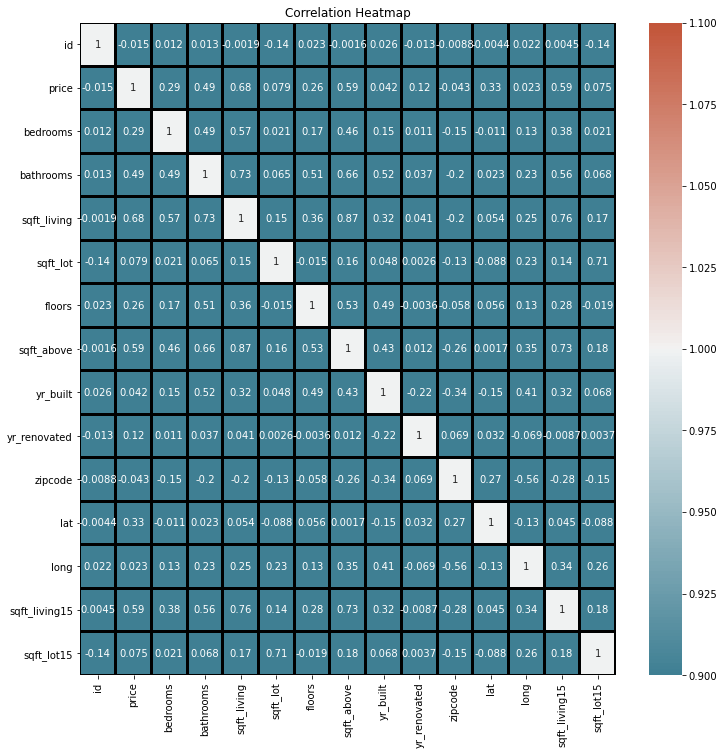

In [35]:
plt.figure(figsize=(12,12))
cmap = sns.diverging_palette(220,20,n=200)
heatmap = sns.heatmap(df.corr(),vmin=1,vmax=1,annot=True,cmap=cmap,linewidths=2,linecolor='black')
heatmap.set_title('Correlation Heatmap');
# This heatmap further cements the correlation found between the variables.


At first sight, there is one red colored squares that get my  attention. The first one refers to the 'bathrooms' and 'sqft_living' variables.

Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs.

Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'price' correlations. We can see our well-known 'bathrooms', 'sqft_living', and 'sqft_lot' saying a big 'Hi!', but we can also see many other variables that should be taken into account. That's what we will do next.

# Exploring 'price' column


In [36]:
#descriptive statistics summary of the price column
summary_statistics = df.price.describe()
print("count:",summary_statistics[1])
print("Mean of the price:",summary_statistics[1])
print("Standard deviation of mean:",summary_statistics[2])
print("Minimum value for price:",summary_statistics[3])
print("Lower quantile for price:",summary_statistics[4])
print("median for price:",summary_statistics[5])
print("Upper quantile for the price:",summary_statistics[6])
print("Maximum value for the price:",summary_statistics[7])

count: 530517.328832
Mean of the price: 530517.328832
Standard deviation of mean: 332719.5856992754
Minimum value for price: 82000.0
Lower quantile for price: 320000.0
median for price: 450000.0
Upper quantile for the price: 637800.0
Maximum value for the price: 4490000.0


Price correlation matrix (zoomed heatmap style)

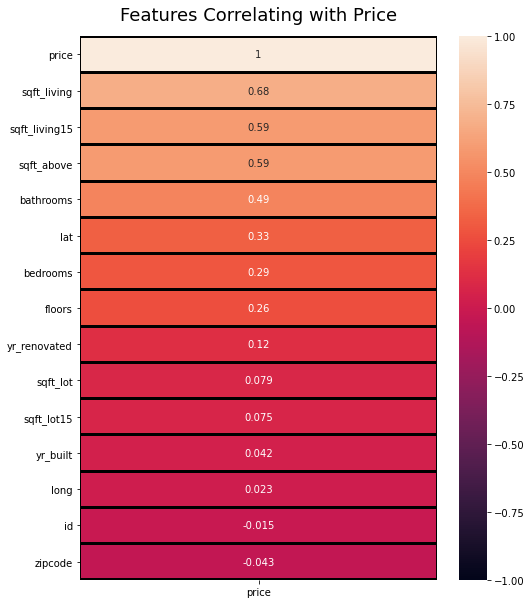

In [37]:
#number of variables for the heatmap 
plt.figure(figsize=(8, 10))
heatmap = sns.heatmap(
    df.corr()[['price']].sort_values(by='price',ascending=False),
    vmin=-1, vmax=1, annot=True,linewidths=2, linecolor='black')
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16);

According to our heatmap table, these are variables most correlated with 'price'. 
"sqft_living", "sqft_above" and "sqft_living15" are strongly correlated with "price".

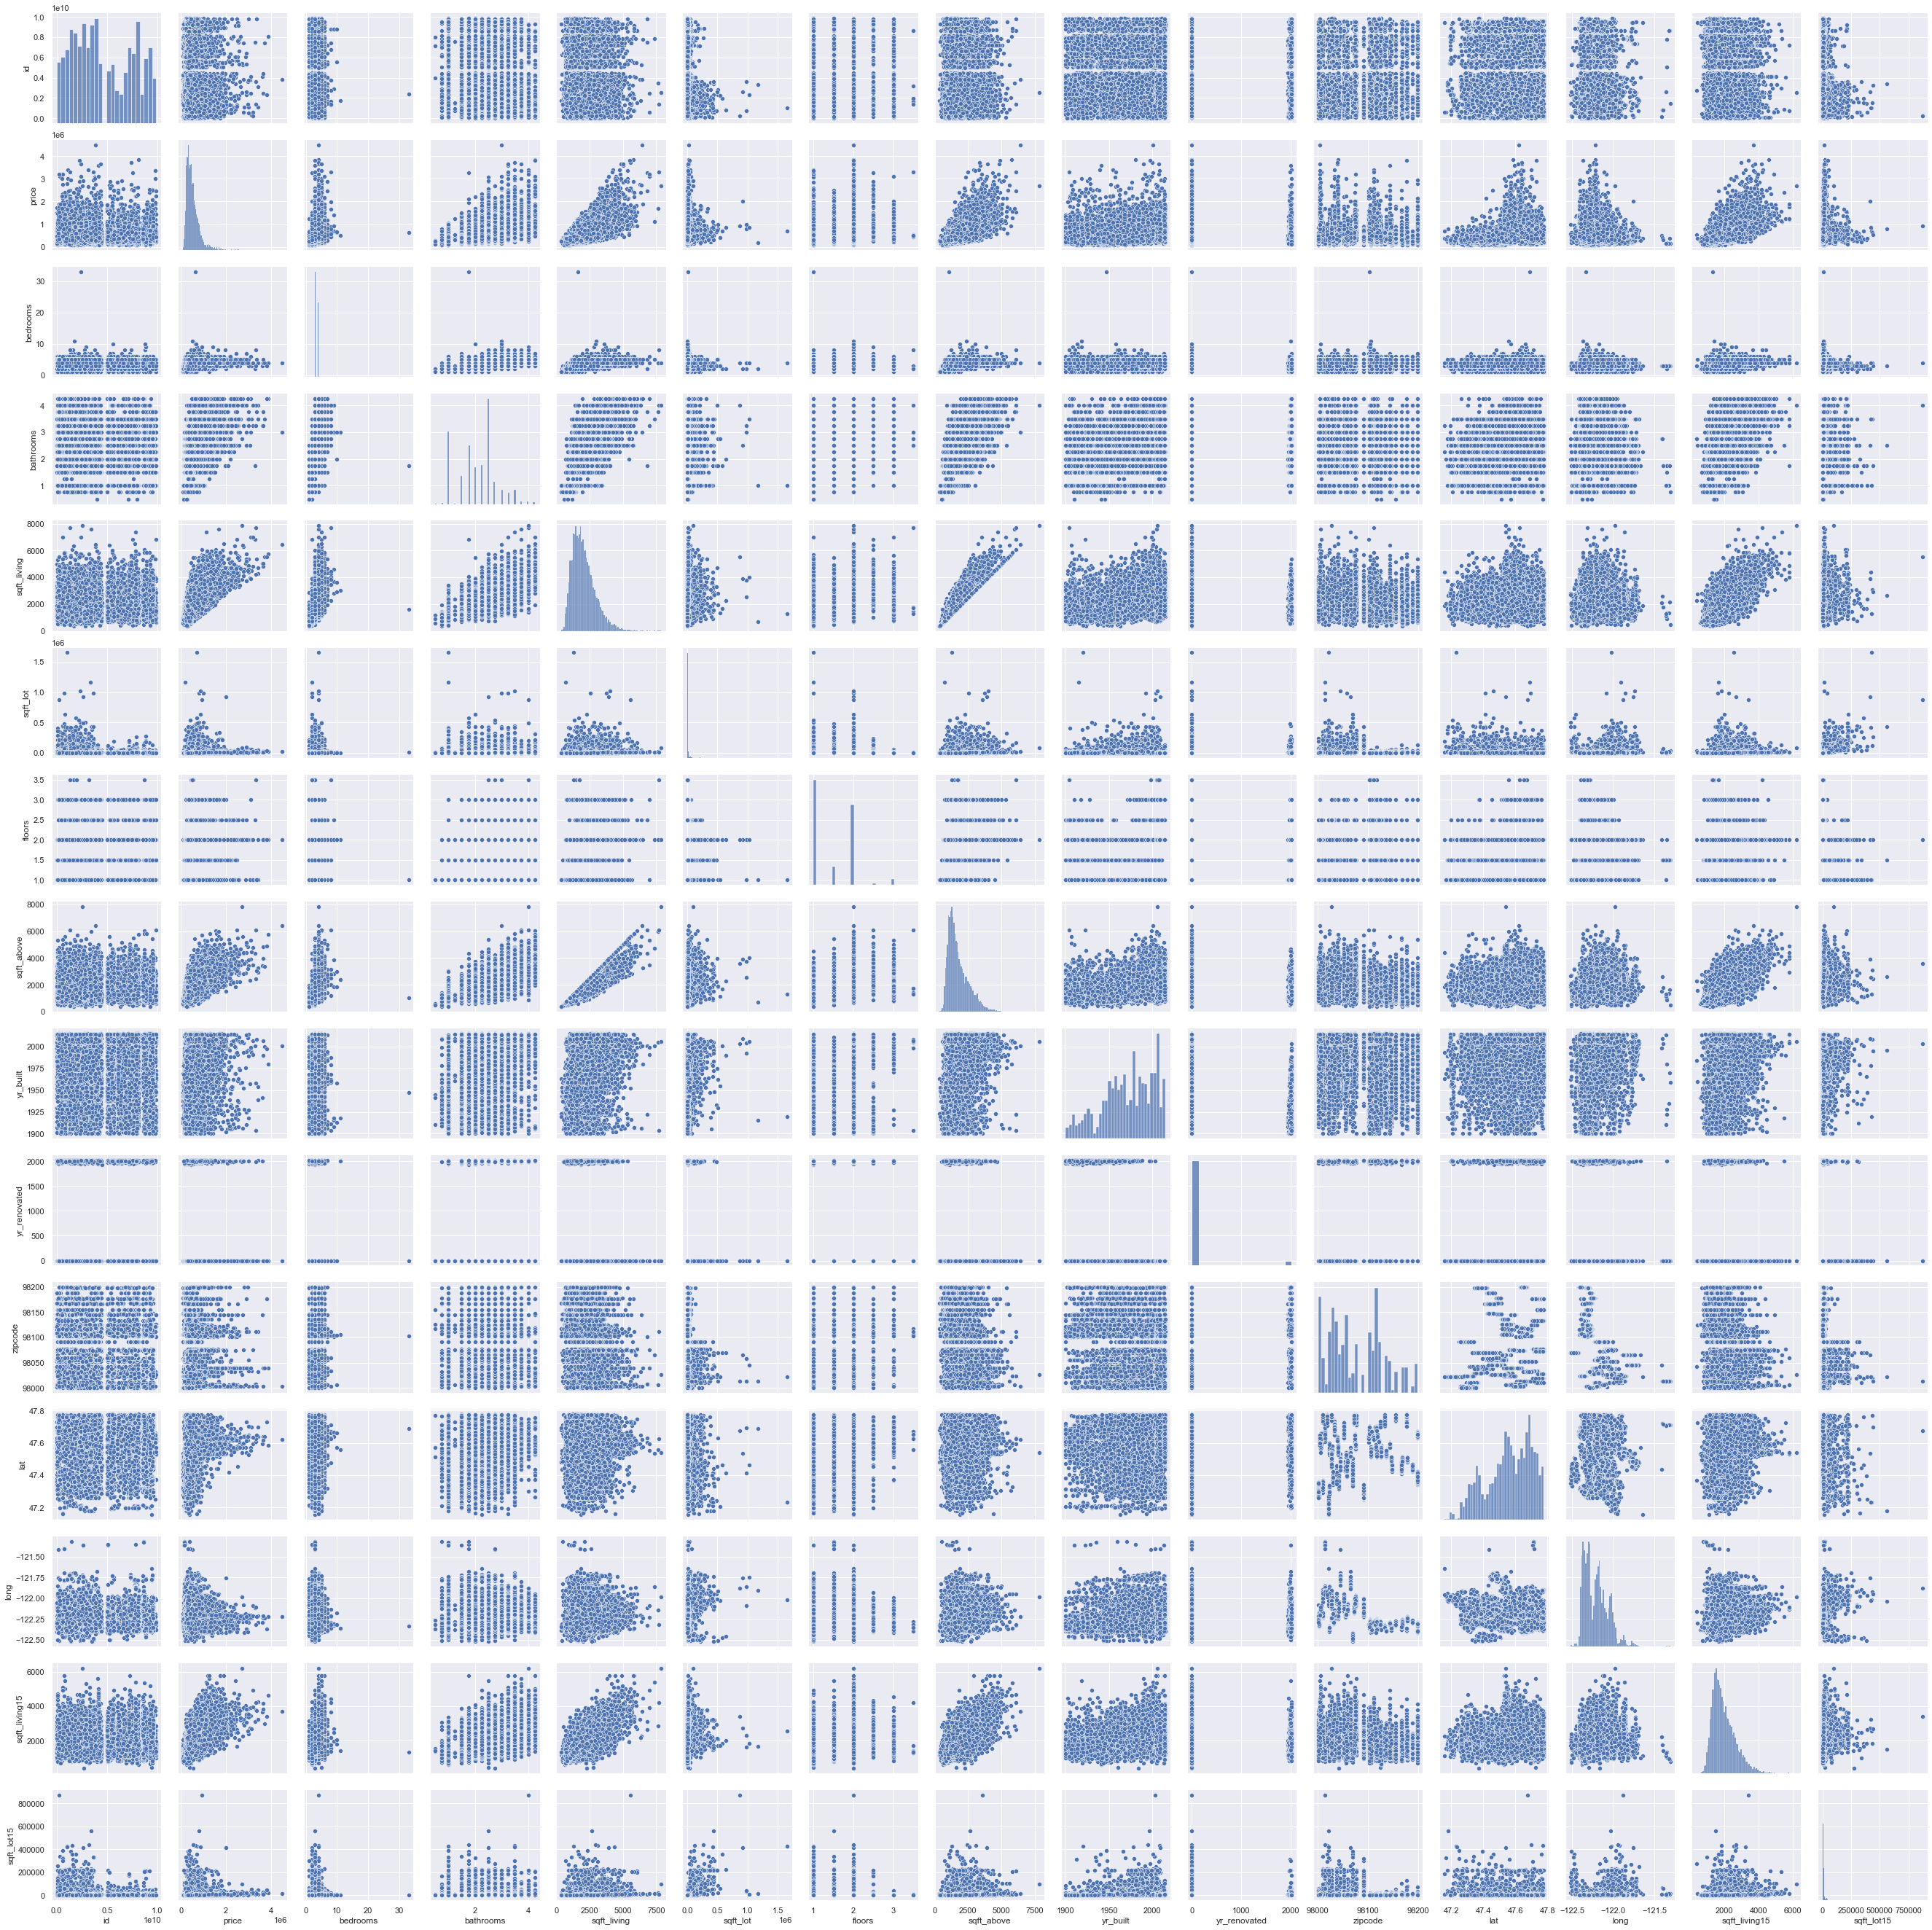

In [38]:
#scatterplot
sns.set()
sns.pairplot(df, size = 2.5)
plt.show();
# a larger view of the correlation in the data, just for reference.

# Simple linear regression

We will use bathrooms as our independent variable and price as our dependent variable in this model.

Determining x and y variables

In [39]:
# independent variable
X_baseline = df.bathrooms

# dependent variable 
y = df.price

# Creating a model

The "model" in StatsModels is the result of calling the OLS constructor function.

We will also use the add constant method because StatsModels expects a column of constant values if the resulting regression contains a constant.

In [40]:
#Creating a simple linear regression model 
#Ordinary least squares
model = sm.OLS(endog = y, exog =sm.add_constant(X_baseline))
model

In [41]:
#Fit the model
results = model.fit()
results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     4939.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:08:58   Log-Likelihood:            -2.1870e+05
No. Observations:               15625   AIC:                         4.374e+05
Df Residuals:                   15623   BIC:                         4.374e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.708e+04   7124.887      8.011      0.0

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     4939.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:08:59   Log-Likelihood:            -2.1870e+05
No. Observations:               15625   AIC:                         4.374e+05
Df Residuals:                   15623   BIC:                         4.374e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.708e+04   7124.887      8.011      0.000    4.31e+04     7.1e+04
bathrooms   2.258e+05   3213.150     70.280      0.000     2.2e+05    2.32e+05
==============================================================================
Omnibus:                     9840.169   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           179868.575
Skew:                           2.726   Prob(JB):                         0.00
Kurtosis:                      18.702   Cond. No.                         8.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
#Model parameters
results.params

const         57078.647105
bathrooms    225818.624235
dtype: float64

In [44]:
#Model parameters
print(results.conf_int())

                       0              1
const       43113.043329   71044.250881
bathrooms  219520.477249  232116.771220


# Mean Absolute Error 

In [45]:
#calculating the mean absolute error of the 
MAE=results.resid.abs().sum()/len(y)
MAE

195272.9767261996

# Model Summary

1. Our 95% confidence interval for the intercept is about 43113.043329 to about 71044.250881.

2. Our 95% confidence interval for the coefficient of bathrooms is about 219520.477249 to about 232116.771220

3. The model is statistically significant having F-statistic p-   value below the alpha,given that the alpha is 0.05.
4. The model explains about 28% of the variance in price.
5. The model coefficients (const and bathrooms) are both statistically significant having t-statistic p-values below the alpha,given that the alpha is 0.05.
6. Looking at the summary above, we can see that the regression line we found was

            price=5.708e+04 + 2.258e+05bathrooms


7. In short, when you add one bathroom to a house, the price rises by 225818.624235 dollars.

# Plotting Fit

This method displays a scatter plot of actual values as well as points indicating the model's predicted values. The confidence intervals for each prediction are represented by the black vertical lines.

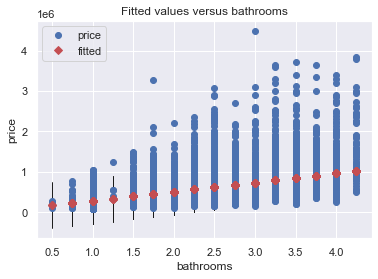

In [46]:
#Visualising our model
sm.graphics.plot_fit(results, 'bathrooms')
plt.show()

In [47]:
results.resid

1        -27170.551633
3       -130534.519808
4          1284.104426
6       -307670.551633
8        -53397.271339
             ...      
21591   -146625.207691
21592   -261625.207691
21593   -221625.207691
21594    175658.384719
21596     98557.384719
Length: 15625, dtype: float64

# Plotting Residuals 

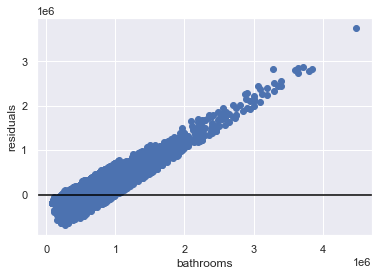

In [48]:
#Visualising the distribution of the residuals
fig, ax = plt.subplots()
ax.scatter(df.price, results.resid)
ax.axhline(y=0, color='black')
ax.set_xlabel('bathrooms')
ax.set_ylabel('residuals');

A Q-Q plot is another tool that can be used to visualize the distribution of residuals. It compares the residual quantiles to the quantiles of a theoretical normal distribution. The further the data points appear from the line, the further they are from a normal distribution.

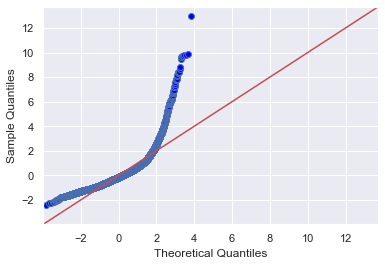

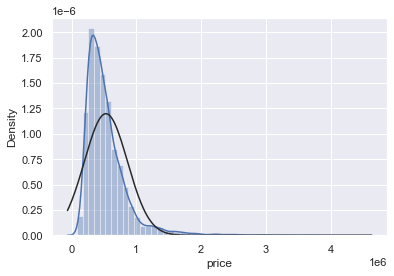

In [49]:
from scipy.stats import norm 
sm.graphics.qqplot(results.resid, dist=stats.norm, line='45', fit = True)
plt.show()
sns.distplot(df.price, fit=norm);

The price is not normal. It has 'peakedness,' positive skewness, and does not conform to the diagonal line. A simple data transformation can solve the problem; log transformations work well in this case of positive skewness.

In [50]:
#apply log transformation
df.log_price = np.log(df.price)

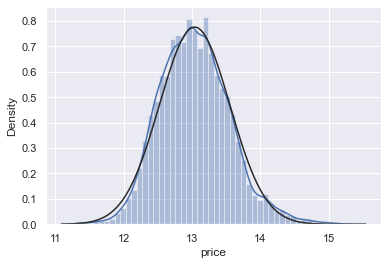

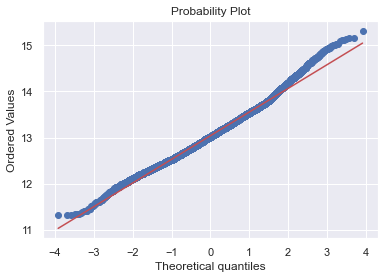

In [51]:
#transformed histogram and normal probability plot
sns.distplot(df.log_price, fit=norm);
fig = plt.figure()
r = stats.probplot(df.log_price, plot=plt)

# Multiple Linear Regression


In [52]:
x_2 = df[['bathrooms', 'sqft_above']]
x_2

,bathrooms,sqft_above
1,2.25,2170
3,3.00,1050
4,2.00,1680
6,2.25,1715
8,1.00,1050
...,...,...
21591,2.50,1180
21592,2.50,1530
21593,2.50,2310
21594,0.75,1020


In [53]:
model_2 = sm.OLS(endog= y, exog= sm.add_constant(x_2))
results_2 = model_2.fit()
print(results_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     4444.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:09:02   Log-Likelihood:            -2.1732e+05
No. Observations:               15625   AIC:                         4.347e+05
Df Residuals:                   15622   BIC:                         4.347e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6139.9678   6591.976      0.931      0.3

In [54]:
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.363
Method:                 Least Squares   F-statistic:                     4444.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:09:02   Log-Likelihood:            -2.1732e+05
No. Observations:               15625   AIC:                         4.347e+05
Df Residuals:                   15622   BIC:                         4.347e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6139.9678   6591.976      0.931      0.352   -6781.068    1.91e+04
bathrooms   8.463e+04   3912.450     21.630      0.000     7.7e+04    9.23e+04
sqft_above   195.8439      3.576     54.770      0.000     188.835     202.853
==============================================================================
Omnibus:                     9178.743   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           147460.233
Skew:                           2.516   Prob(JB):                         0.00
Kurtosis:                      17.184   Cond. No.                     6.49e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Summary

1. The model is statistically significant having F-statistic p- value below the alpha,given that the alpha is 0.05.
2. The model explains about 36% of the variance in price.
3. The model coefficients (const and bathrooms) are both statistically significant having t-statistic p-values below the alpha,given that the alpha is 0.05.
4. Looking at the summary above, we can see that the regression line we found was 

^
p
r
i
c
e
=
6139.9678
+
8.463e+04
bathrooms
+
23730
sqft_above


5. The price of a house rises by 84630 dollars as the number of bathrooms increases, and thus rises by 23730 dollars per foot of house apart from the basement.

In [55]:
results_2.params

const          6139.967801
bathrooms     84626.821985
sqft_above      195.843857
dtype: float64

# Mean Absolute Error

In [56]:
#calculating the mean absolute error of the 
MAE_2=results_2.resid.abs().sum()/len(y)
MAE_2

179752.20670752059

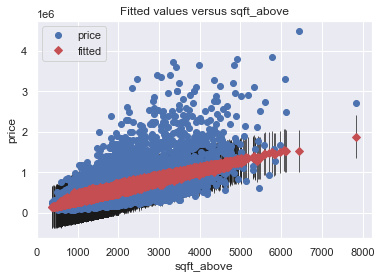

In [57]:
sm.graphics.plot_fit(results_2, 'sqft_above')
plt.show()

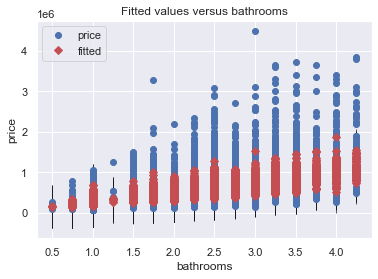

In [58]:
sm.graphics.plot_fit(results_2, 'bathrooms')
plt.show()

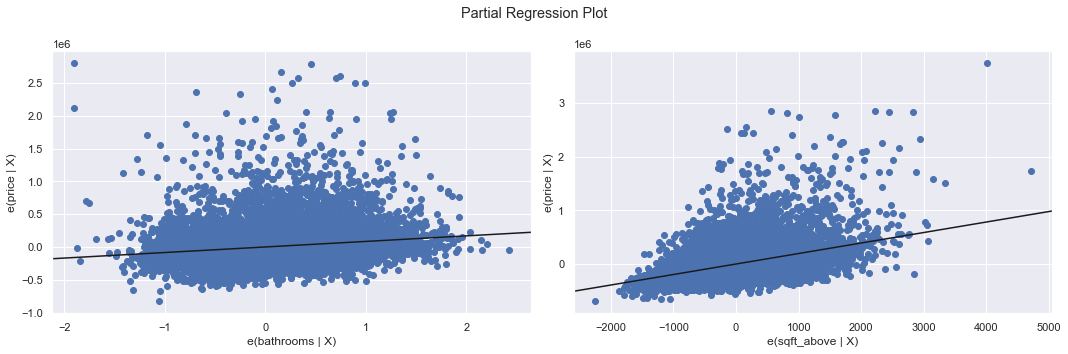

In [59]:
#partial regression plot
fig = plt.figure(figsize=(15,5))
sm.graphics.plot_partregress_grid(results_2, exog_idx=['bathrooms', 'sqft_above'], fig=fig),
plt.tight_layout()
plt.show()

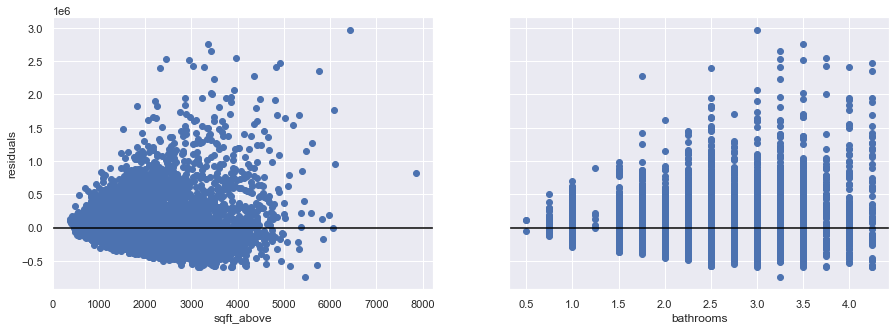

In [60]:
#visualizing the distribution of the residuals
fig, axes = plt.subplots(ncols=2, figsize=(15,5), sharey=True)
sqft_above_ax = axes[0]
sqft_above_ax.scatter(df.sqft_above, results_2.resid)
sqft_above_ax.axhline(y=0, color="black")
sqft_above_ax.set_xlabel("sqft_above")
sqft_above_ax.set_ylabel("residuals")
year_ax = axes[1]
year_ax.scatter(df.bathrooms, results_2.resid)
year_ax.axhline(y=0, color="black")
year_ax.set_xlabel("bathrooms");

# Multiple Regression with Many Features

In [61]:
x_all = df.drop('price', axis=1).select_dtypes('number')
x_all

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1,6414100192,3,2.25,2570,7242,2.0,2170,1951,1991.0,98125,47.7210,-122.319,1690,7639
3,2487200875,4,3.00,1960,5000,1.0,1050,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,3,2.00,1680,8080,1.0,1680,1987,0.0,98074,47.6168,-122.045,1800,7503
6,1321400060,3,2.25,1715,6819,2.0,1715,1995,0.0,98003,47.3097,-122.327,2238,6819
8,2414600126,3,1.00,1780,7470,1.0,1050,1960,0.0,98146,47.5123,-122.337,1780,8113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,3,2.50,1310,1294,2.0,1180,2008,0.0,98116,47.5773,-122.409,1330,1265
21592,263000018,3,2.50,1530,1131,3.0,1530,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,4,2.50,2310,5813,2.0,2310,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2,0.75,1020,1350,2.0,1020,2009,0.0,98144,47.5944,-122.299,1020,2007


In [62]:
model_3 = sm.OLS(y, sm.add_constant(x_all))
results_3 = model_3.fit()

print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     1844.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:09:05   Log-Likelihood:            -2.1322e+05
No. Observations:               15625   AIC:                         4.265e+05
Df Residuals:                   15610   BIC:                         4.266e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.601e+07   3.43e+06     -4.671

# Mean Absolute Error

In [63]:
#calculating the mean absolute error of the 
MAE_3=results_3.resid.abs().sum()/len(y)
MAE_3

132959.41131680648

In [64]:
results_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.623
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     1844.
Date:                Sat, 01 Oct 2022   Prob (F-statistic):               0.00
Time:                        11:09:05   Log-Likelihood:            -2.1322e+05
No. Observations:               15625   AIC:                         4.265e+05
Df Residuals:                   15610   BIC:                         4.266e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -1.601e+07   3.43e+06     -4.671      0.000   -2.27e+07   -9.29e+06
id            -7.953e-07   5.77e-07     -1.379      0.168   -1.93e-06    3.35e-07
bedrooms      -4.792e+04   2234.648    -21.444      0.000   -5.23e+04   -4.35e+04
bathrooms      4.868e+04   4015.027     12.124      0.000    4.08e+04    5.65e+04
sqft_living     199.8264      5.159     38.733      0.000     189.714     209.939
sqft_lot          0.2234      0.057      3.931      0.000       0.112       0.335
floors         3.379e+04   4326.810      7.810      0.000    2.53e+04    4.23e+04
sqft_above       24.2491      5.175      4.686      0.000      14.106      34.392
yr_built      -2305.5808     79.884    -28.862      0.000   -2462.162   -2148.999
yr_renovated     33.2578      4.345      7.654      0.000      24.741      41.775
zipcode        -493.0311     38.968    -12.652      0.000    -569.413    -416.649
lat            6.211e+05   1.25e+04     49.516      0.000    5.97e+05    6.46e+05
long          -3.212e+05   1.55e+04    -20.750      0.000   -3.52e+05   -2.91e+05
sqft_living15   104.0654      4.001     26.007      0.000      96.222     111.909
sqft_lot15       -0.3176      0.087     -3.641      0.000      -0.489      -0.147
==============================================================================
Omnibus:                    10135.340   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           266654.153
Skew:                           2.706   Prob(JB):                         0.00
Kurtosis:                      22.501   Cond. No.                     1.14e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Model Summary

price =
-1.601e+07
-7.953e-07
id
-4.792e+04
bedrooms
+4.868e+04
bathrooms
+199.8264
sqft_living
+0.2234
sqft_lot
+3.379e+04
floors
+24.2491
sqft_above
-2305.5808
yr_built
+33.2578
yr_renovated
-493.0311
zipcode
+6.211e+05
lat
-3.212e+05
long
+104.0654
sqft_living15
-0.3176
sqft_lot15


The model is statistically significant overall, with an F-statistic p-value well below 0.05
1. The model explains about 63% of the variance in price. 

The fact that we went from 2 predictors to 14 predictors and increased the R-Squared by 27% is an indicator that this is a good model.

2. Nearly all of the model coefficients have p-values less than 0.05 and are thus statistically significant.

3. id has a p-value of above 0.05. This means that there is greater than a 1 in 20 chance that their true coefficients are 0 (i.e. they have no effect on price), and are thus not statistically significant at an alpha of 0.05
4. Looking at the summary above, we can see that the regression line we found was

price =
-1.601e+07
-7.953e-07
id
-4.792e+04
bedrooms
+4.868e+04
bathrooms
+199.8264
sqft_living
+0.2234
sqft_lot
+3.379e+04
floors
+24.2491
sqft_above
-2305.5808
yr_built
+33.2578
yr_renovated
-493.0311
zipcode
+6.211e+05
lat
-3.212e+05
long
+104.0654
sqft_living15
-0.3176
sqft_lot15


# Linear Regression Model Results 

1. The third model where all the predictor variables were were used explains about 63% of variance in price unlike the previous models that explains about 24%, 36% of variance respectively.
2. All the models are statistically significant having a p_value of less than 0.005
3. The value of our r_squared constantly increase as we add more predictors.
4. The last model would be an ideal in predicting the current and future prices of the house.

# Recommendation

1. Coefficients such as house condition, bedrooms, bathrooms, and sqft living, in general increasing the acreage of the property should be considered because they have a positive impact on prices.
2. I could very well recommend that the Agency use the last model because it has a higher r squared value of 0.63, which translates to 63% model accuracy.
3. If the Agency wants to increase its sales, I recommend that they focus on building average grade 7 houses because the majority of buyers prefer to buy this type of houses.